In [28]:
import gym
import matplotlib
import numpy as np
import sys
%load_ext autoreload
%autoreload 2
%matplotlib inline
from collections import defaultdict
import os
ROOT_DIR = os.environ['ROOT_DIR']
sys.path.append(ROOT_DIR)
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
from MC import mc
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
env = BlackjackEnv()

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [6]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]

    return V    

In [7]:
V_10k = mc.mc_prediction(sample_policy, env, num_episodes=10000)
#V_500k = mc.mc_prediction(sample_policy, env, num_episodes=500000)
#plotting.plot_value_function(V_500k, title="500,000 Steps")

100%|██████████| 10000/10000 [00:01<00:00, 8894.26it/s]


In [12]:
X,Y,Z = plotting.plot_value_function(V_10k, title="500,000 Steps")

In [22]:

from mpl_toolkits.mplot3d.axes3d import Axes3D

In [62]:
!pip install mayavi

    100% |████████████████████████████████| 7.0MB 1.1MB/s ta 0:00:01    31% |██████████▏                     | 2.2MB 2.2MB/s eta 0:00:03    61% |███████████████████▉            | 4.4MB 2.3MB/s eta 0:00:02
    100% |████████████████████████████████| 245kB 2.3MB/s ta 0:00:01
    100% |████████████████████████████████| 378kB 2.9MB/s ta 0:00:01    51% |████████████████▍               | 194kB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 5.2MB 1.9MB/s ta 0:00:01    11% |███▉                            | 624kB 1.8MB/s eta 0:00:03    34% |███████████                     | 1.8MB 2.3MB/s eta 0:00:02    36% |███████████▋                    | 1.9MB 2.3MB/s eta 0:00:02    38% |████████████▎                   | 2.0MB 2.0MB/s eta 0:00:02    67% |█████████████████████▌          | 3.5MB 2.3MB/s eta 0:00:01    73% |███████████████████████▋        | 3.9MB 1.8MB/s eta 0:00:01    76% |████████████████████████▎       | 4.0MB 2.1MB/s eta 0:00:01    80% |█████████████████████████▊      | 4.

  Running setup.py bdist_wheel for mayavi ... error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-eb_zpojm/mayavi/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-pb5q_u7r --python-tag cp35:
  running bdist_wheel
  running build
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-eb_zpojm/mayavi/setup.py", line 469, in <module>
      **config
    File "/headless/.local/lib/python3.5/site-packages/numpy/distutils/core.py", line 169, in setup
      return old_setup(**new_attr)
    File "/usr/lib/python3.5/distutils/core.py", line 148, in setup
      dist.run_commands()
    File "/usr/lib/python3.5/distutils/dist.py", line 955, in run_commands
      self.run_command(cmd)
    File "/usr/lib/python3.5/distutils/dist.py", line 974, in run_command
      cmd_ob

In [61]:
import numpy
from mayavi.mlab import *

def test_contour_surf():
    """Test contour_surf on regularly spaced co-ordinates like MayaVi."""
    def f(x, y):
        sin, cos = np.sin, np.cos
        return sin(x + y) + sin(2 * x - y) + cos(3 * x + 4 * y)

    x, y = np.mgrid[-7.:7.05:0.1, -5.:5.05:0.05]
    s = contour_surf(x, y, f)
    return s

ImportError: No module named 'mayavi'

In [51]:
from numpy import *

In [52]:
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

In [53]:
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

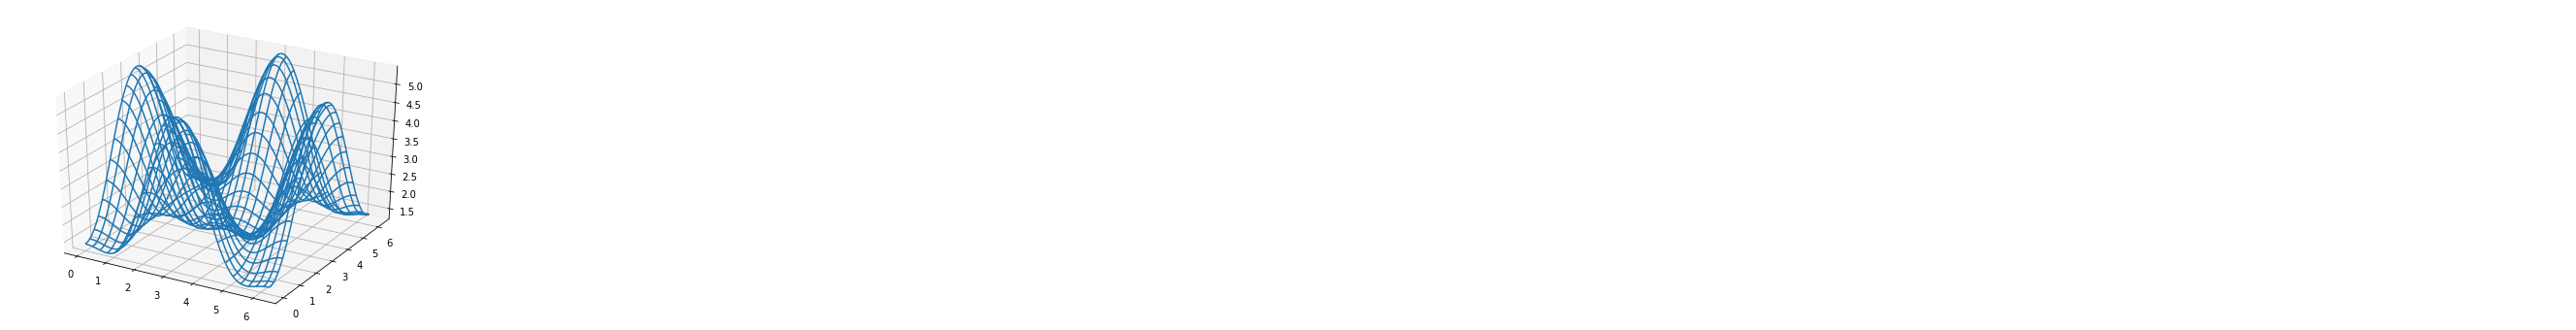

In [56]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)